In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import curve_fit

In [4]:
def line(x, a):
    return a*x

true_a = 1

xs = np.arange(0, 10, 1)
yerrs = (xs / 8)**1.2 + 0.5
ys = line(xs, true_a) + np.array([np.random.normal(0, yerrs[i]) for i in range(len(yerrs))])
yerrs *= 0.5

theory_ys = line(xs, true_a)

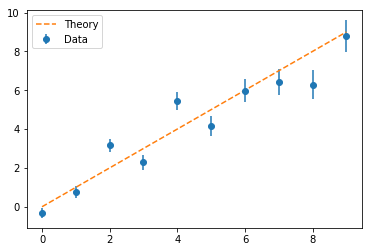

In [5]:
plt.errorbar(xs, ys, yerrs, fmt = 'o', label = 'Data')
plt.plot(xs, theory_ys, '--', label = 'Theory')
plt.legend()
plt.show()

In [6]:
popt, pcov = curve_fit(line, xs, ys, sigma = yerrs, absolute_sigma = True)
fit_errs = np.sqrt(np.diag(pcov))
for i in range(len(fit_errs)):
    print('p', i, '=', popt[i], '+-', fit_errs[i])

p 0 = 0.9693471803352031 +- 0.037805192373170406


In [7]:
fit_ys = line(xs, popt[0])

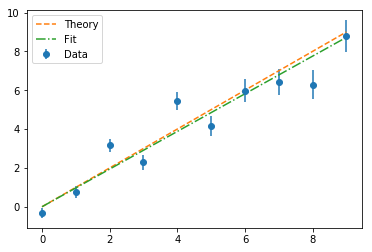

In [8]:
plt.errorbar(xs, ys, yerrs, fmt = 'o', label = 'Data')
plt.plot(xs, theory_ys, '--', label = 'Theory')
plt.plot(xs, fit_ys, '-.', label = 'Fit')
plt.legend()
plt.show()

In [9]:
def chi2(data, fit, errs, dof):
    return np.sum(((data-fit)/errs)**2)/dof

print(chi2(ys, fit_ys, yerrs, len(ys) - len(popt)))

3.8515279949865575


## Fitting without curve_fit

In [10]:
test_values = np.arange(0, 2, 0.0001)

In [11]:
x2_vals = []
for val in test_values:
    test_fit_ys = line(xs, val)
    x2_vals.append(chi2(ys, test_fit_ys, yerrs, len(ys) - 1))
    
fit_val = test_values[np.argmin(x2_vals)]
fit_arg = np.argmin(x2_vals)
fit_x2 = x2_vals[fit_arg]
print('Fitted value =', fit_val)
print('Fit argument =', fit_arg)
print('Fit X2 =', fit_x2)

Fitted value = 0.9693
Fit argument = 9693
Fit X2 = 3.8515281680386675


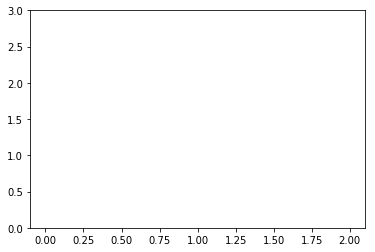

In [12]:
plt.plot(test_values, x2_vals)
plt.ylim(0, 3)
plt.show()

In [13]:
def nderiv(y, x):
    dy = np.zeros(len(y))
    for i in range(len(y) - 1):
        dy[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    dy[-1] = dy[-2]
    return dy

def value(f, x, x0):
    i = np.argmin(np.abs(x - x0))
    return f[i]

In [14]:
dX2_dv = nderiv(x2_vals, test_values)
d2X2_d2v = nderiv(dX2_dv, test_values)

In [15]:
# Right error bar
diff = 0
r_arg = fit_arg
while diff < 1:
    r_arg += 1
    diff = x2_vals[r_arg] - fit_x2
print('Right error bar =', test_values[r_arg] - fit_val)
    
# Left error bar
diff = 0
l_arg = fit_arg
while diff < 1:
    l_arg -= 1
    diff = x2_vals[l_arg] - fit_x2
print('Left error bar =', test_values[l_arg] - fit_val)

Right error bar = 0.11349999999999993
Left error bar = -0.11340000000000006


In [16]:
(0.5*d2X2_d2v[np.argmin(x2_vals)])**(-0.5)

0.11341557716735151